In [1]:
import sys
import matplotlib.pyplot as plt
plt.style.use("plot_style.mplstyle")
import numpy as np
from tqdm import tqdm

sys.path.append("../src/")
from fLe_timecrystal import *
import fBm_stats as fbs
import warnings
warnings.filterwarnings('ignore')

In [2]:
def msd(eq, realizations):
    for r in tqdm(range(realizations)):
        eq_ = fle(eq.alpha, linear = eq.linear)
        eq_.params(T = eq.T, h = eq.h,
                  v0 = eq.v0, M = eq.M,
                  eta_1 = eq.eta_1, eta_2 = eq.eta_2,
                  T1 = eq.T1, T2 = eq.T2)
        eq_.make_B_H()
        eq_.solve()  
        if r == 0:
            df_msd = pd.DataFrame({"t": eq_.t})
        df_msd["x_"+str(r)] = eq_.numerical        
    df_msd.set_index("t", inplace = True)
    msd = fbs.msd(df_msd, False)
    return msd

In [3]:
def plot(ax, eq, realizations = 4000):
    eq.make_B_H()
    if eq.linear == 1:
        eq.msd_linear()
    else:
        eq.msd_non_linear()
    numerical = msd(eq, realizations)
    ax.plot(eq.t, eq.msd, label = r"$\alpha$ = "+str(eq.alpha))
    ax.plot(eq.t, numerical, color = "black", ls = ":")
    ax.legend()
    ax.set_xlim(xmin = 2*eq.h)

# Zero linear friction

0.05


100%|██████████| 5000/5000 [00:52<00:00, 94.53it/s] 


0.3


100%|██████████| 5000/5000 [00:22<00:00, 220.35it/s]


0.5


100%|██████████| 5000/5000 [00:22<00:00, 220.22it/s]


0.8


100%|██████████| 5000/5000 [00:23<00:00, 215.48it/s]


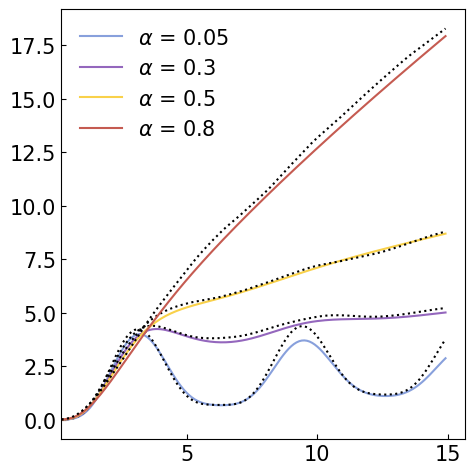

In [17]:
fig, ax = plt.subplots(figsize = (5,5))
alpha = [0.05, 0.3, 0.5, 0.8];

T = 15
h = 0.1
v0 = 0.0
M = 1.0
eta_1 = 0.0
eta_2 = 1.0
T1 = 0.0
T2 = 1.0

linear = 0
axi = ax
for a in alpha:
    print(a)
    eq = fle(a, linear)
    eq.params(T = T, h = h,
            v0 = v0, M = M,
            eta_1 = eta_1, eta_2 = eta_2,
            T1 = T1, T2 = T2)
    plot(axi, eq, 5000)
axi.set_xscale("log")
axi.set_yscale("log")
fig

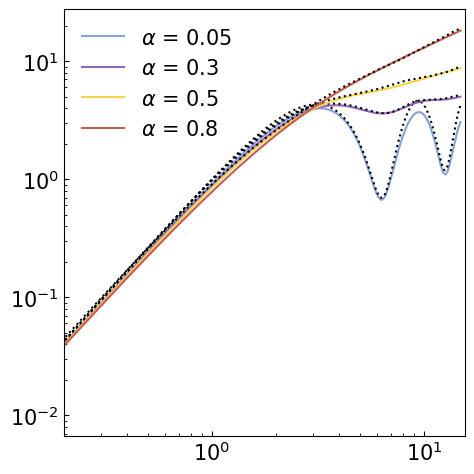

In [16]:
axi.set_xscale("log")
axi.set_yscale("log")
fig

## Time glass

0.05


100%|██████████| 5000/5000 [00:53<00:00, 94.27it/s] 


0.3


100%|██████████| 5000/5000 [00:22<00:00, 224.15it/s]


0.5


100%|██████████| 5000/5000 [00:21<00:00, 229.96it/s]


0.8


100%|██████████| 5000/5000 [00:23<00:00, 211.69it/s]


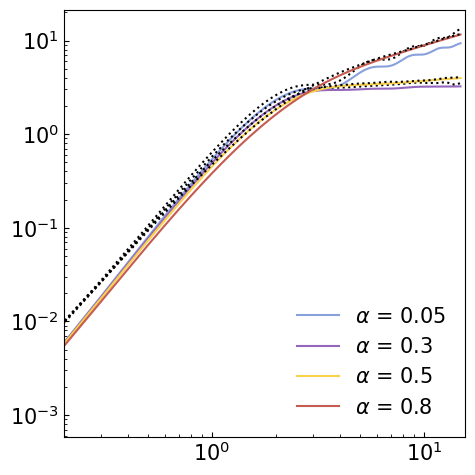

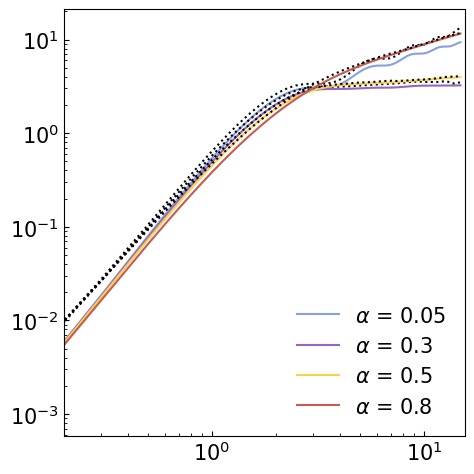

In [18]:
fig, ax = plt.subplots(figsize = (5,5))
alpha = [0.05, 0.3, 0.5, 0.8];

T = 15
h = 0.1
v0 = 0.0
M = 1.0
eta_1 = 1.0
eta_2 = 0.0
T1 = 1.0
T2 = 0.0

linear = 0
axi = ax
for a in alpha:
    print(a)
    eq = fle(a, linear)
    eq.params(T = T, h = h,
            v0 = v0, M = M,
            eta_1 = eta_1, eta_2 = eta_2,
            T1 = T1, T2 = T2)
    plot(axi, eq, 5000)
axi.set_xscale("log")
axi.set_yscale("log")
fig

# Linear and fractional order friction

0.1


100%|██████████| 4000/4000 [01:12<00:00, 55.01it/s]


0.2


100%|██████████| 4000/4000 [01:14<00:00, 53.41it/s]


0.5


100%|██████████| 4000/4000 [00:30<00:00, 130.80it/s]


0.7


100%|██████████| 4000/4000 [00:30<00:00, 129.94it/s]


0.9


100%|██████████| 4000/4000 [00:31<00:00, 128.89it/s]


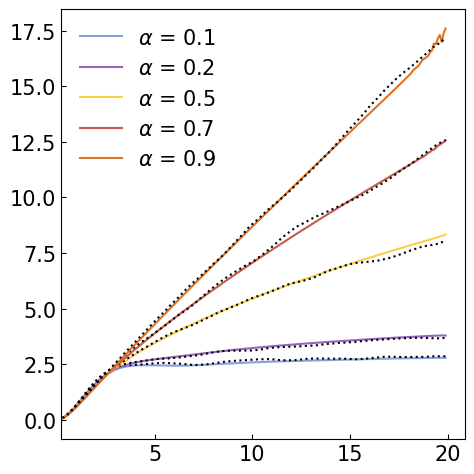

In [4]:
fig, ax = plt.subplots(figsize = (5,5))
alpha = [0.1, 0.2, 0.5, 0.7, 0.9];

T = 20
h = 0.1
v0 = 1.0
M = 1.0
eta_1 = 1.0
eta_2 = 1.0
T1 = 1.0
T2 = 1.0
a = 0.1
linear = 1
axi = ax
for a in alpha:
    print(a)
    eq = fle(a, linear)
    eq.params(T = T, h = h,
            v0 = v0, M = M,
            eta_1 = eta_1, eta_2 = eta_2,
            T1 = T1, T2 = T2)
    plot(axi, eq)

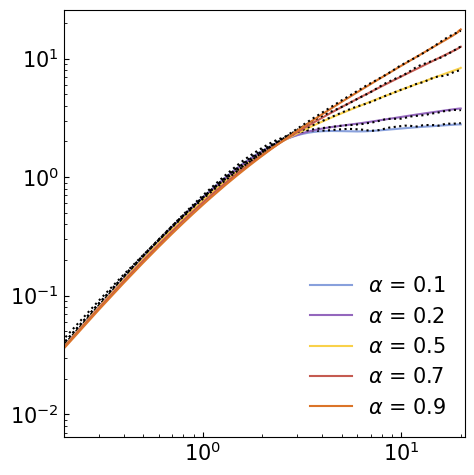

In [5]:
axi.set_xscale("log")
axi.set_yscale("log")
fig

In [ ]:
fig, ax = plt.subplots(1,3, figsize = (15,5))
alpha = [0.1, 0.2, 0.5, 0.7, 0.9];


In [ ]:
#Time crystal
T = 20
h = 0.1
v0 = 1.0
M = 1.0
eta_1 = 0.0
eta_2 = 1.0
T1 = 0.0
T2 = 1.0
a = 0.1
linear = 0
axi = ax[0]
for a in alpha:
    print(a)
    eq = fle(a, linear)
    eq.params(T = T, h = h,
            v0 = v0, M = M,
            eta_1 = eta_1, eta_2 = eta_2,
            T1 = T1, T2 = T2)
    plot(axi, eq)



In [ ]:
#Time glass
T = 20
h = 0.05
v0 = 1.0
M = 1.0
eta_1 = 1.0
eta_2 = 0.0
T1 = 1.0
T2 = 0.0
a = 0.1
linear = 0
axi = ax[1]
for a in alpha:
    print(a)
    eq = fle(a, linear)
    eq.params(T = T, h = h,
            v0 = v0, M = M,
            eta_1 = eta_1, eta_2 = eta_2,
            T1 = T1, T2 = T2)
    plot(axi, eq)

In [ ]:
#Mixed phase
T = 20
h = 0.05
v0 = 1.0
M = 1.0
eta_1 = 1.0
eta_2 = 1.0
T1 = 1.0
T2 = 1.0
a = 0.1
linear = 0
axi = ax[2]
for a in alpha:
    print(a)
    eq = fle(a, linear)
    eq.params(T = T, h = h,
            v0 = v0, M = M,
            eta_1 = eta_1, eta_2 = eta_2,
            T1 = T1, T2 = T2)
    plot(axi, eq)

In [ ]:
for axi in ax:
    axi.set_xscale("log")
    axi.set_yscale("log")
fig